In [22]:
import torch 
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

In [24]:
g = torch.Generator().manual_seed(SEED)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda


In [26]:
root = r"C:\Users\yacan\Desktop\Pytorch\dataset"
DATASET_NAME = "CIFAR10"

In [27]:
base_train = datasets.CIFAR10(root=root, train=True, download=True, transform=None)
base_test = datasets.CIFAR10(root=root, train=False, download=True, transform=None)
classes = base_train.classes

100.0%


### Dataset 

In [36]:
from PIL import Image

In [37]:
class CIFARDataset(Dataset):
    def __init__(self, ds, indices=None, transforms=None):
        self.data = ds.data
        self.targets = ds.targets
        self.indices = list(range(len(self.data))) if indices is None else list(indices)
        self.transforms = transforms

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        img, target = self.data[self.indices[idx]], self.targets[self.indices[idx]]

        img = Image.fromarray(img)
        if self.transforms:
            img = self.transforms(img)
        return img, target


In [38]:
validation_ratio = 0.1
N = len(base_train)
validation_size = int(N * validation_ratio)

perm = torch.randperm(N, generator=g)
train_indices = perm[validation_size:].tolist()
val_indices = perm[:validation_size].tolist()

In [39]:
mean, std = (0.4917, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

val_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


In [40]:
train_ds = CIFARDataset(base_train, indices=train_indices, transforms=train_transforms)
val_ds = CIFARDataset(base_train, indices=val_indices, transforms=val_transforms)
test_ds = CIFARDataset(base_test, transforms=val_transforms)


In [41]:
print("Train Size:", len(train_ds))
print("Validation Size:", len(val_ds))
print("Test Size:", len(test_ds))

Train Size: 45000
Validation Size: 5000
Test Size: 10000


### DataLoader

In [42]:
BATCH_SIZE = 128
pin_memory = torch.cuda.is_available()

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, pin_memory=pin_memory, num_workers=0)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, pin_memory=pin_memory, num_workers=0)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, pin_memory=pin_memory, num_workers=0)

print("Train Loader Size:", len(train_loader))
print("Validation Loader Size:", len(val_loader))
print("Test Loader Size:", len(test_loader))

Train Loader Size: 352
Validation Loader Size: 40
Test Loader Size: 79


In [44]:
x, y = next(iter(train_loader))
print("Batch X shape:", x.shape)
print("Batch X dtype:", x.dtype)
print("Batch Y shape:", y.shape)
print("Batch Y dtype:", y.dtype)

Batch X shape: torch.Size([128, 3, 32, 32])
Batch X dtype: torch.float32
Batch Y shape: torch.Size([128])
Batch Y dtype: torch.int64


In [45]:
mean_t = torch.tensor(mean).view(len(mean),1 ,1)
std_t = torch.tensor(std).view(len(std),1 ,1)

def unnormalize(x_image):
    return x_image * std_t + mean_t



In [46]:
grid = torchvision.utils.make_grid(unnormalize(x[:32]))

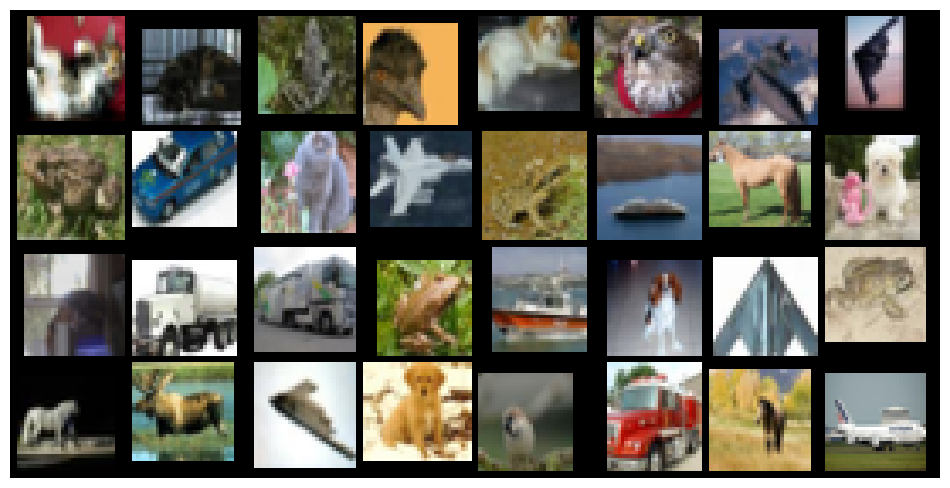

In [48]:
plt.figure(figsize=(12, 12))
if grid.shape[0] == 1:
    plt.imshow(grid.squeeze(0), cmap="gray")
else: 
    plt.imshow(grid.permute(1, 2, 0).clamp(0, 1))
plt.axis("off")
plt.show()

In [49]:
print("İlk 10 görüntünün sınıfları:", [classes[int(y)] for y in y[:32]])

İlk 10 görüntünün sınıfları: ['cat', 'cat', 'frog', 'bird', 'dog', 'bird', 'airplane', 'airplane', 'frog', 'automobile', 'cat', 'airplane', 'frog', 'ship', 'horse', 'dog', 'cat', 'truck', 'truck', 'frog', 'ship', 'dog', 'airplane', 'frog', 'horse', 'deer', 'airplane', 'dog', 'bird', 'truck', 'horse', 'airplane']
